# "코로나 단계별 제주도 입도객 분석 및 예측"
> "제주도 코로나19 사회적 거리두기에 따른 입도객 추이 분석 및 예측"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 곽예본, 김진교, 이채원
- categories: [analysis]

## 한글폰트

In [123]:
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 40 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## Facebook의 Prophet 모델을 사용한 입도객 예측

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('visitor.csv')

In [ ]:
df

,time,visitor
0,2020-01-01,1104438
1,2020-02-01,599575
2,2020-03-01,477176
3,2020-04-01,541099
4,2020-05-01,765616
5,2020-06-01,860528
6,2020-07-01,988093
7,2020-08-01,1127098
8,2020-09-01,726169
9,2020-10-01,1072455


In [ ]:
df['time'] = pd.DatetimeIndex(df['time'])
df['visitor'] = df['visitor'].astype('float64')

In [ ]:
df

,time,visitor
0,2020-01-01,1104438.0
1,2020-02-01,599575.0
2,2020-03-01,477176.0
3,2020-04-01,541099.0
4,2020-05-01,765616.0
5,2020-06-01,860528.0
6,2020-07-01,988093.0
7,2020-08-01,1127098.0
8,2020-09-01,726169.0
9,2020-10-01,1072455.0


In [ ]:
df.columns = ['ds', 'y']

In [ ]:
df

,ds,y
0,2020-01-01,1104438.0
1,2020-02-01,599575.0
2,2020-03-01,477176.0
3,2020-04-01,541099.0
4,2020-05-01,765616.0
5,2020-06-01,860528.0
6,2020-07-01,988093.0
7,2020-08-01,1127098.0
8,2020-09-01,726169.0
9,2020-10-01,1072455.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      17 non-null     datetime64[ns]
 1   y       17 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 400.0 bytes


In [ ]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

### 모델링

In [71]:
m = Prophet(
    interval_width=0.95,
    yearly_seasonality='auto',
    weekly_seasonality=True, 
    daily_seasonality='auto',
    seasonality_mode='additive', 
    changepoint_prior_scale=0.1, 
)

# interval_width=0.95, # 불확실성
# seasonality_mode='additive' # 가법모델(앞에 값을 계속 더함 
#                  -> 관광객은 계속 꾸준히 증가하는 것이 아니라 상황에 따라 변할 수 있기 때문에 적절치 않음)
# seasonality_mode='multiplicative' # 승법모델
# changepoint_prior_scale=0.1 트렌드의 유연성, 코로나 상황별 극심하게 변하므로 값을 좀 더 높게

m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


### 5개월 간의 예측

In [68]:
예측날짜 = m.make_future_dataframe(periods=5, freq='M') #freq 주기 : 연 y, 월 m, 일 d
예측날짜

,ds
0,2020-01-01
1,2020-02-01
2,2020-03-01
3,2020-04-01
4,2020-05-01
5,2020-06-01
6,2020-07-01
7,2020-08-01
8,2020-09-01
9,2020-10-01


In [72]:
 예측값 = m.predict(예측날짜)
 예측값.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
17,2021-05-31,334154.620899,596057.922820,1.294217e+06,334154.618660,334154.623482,621657.155689,621657.155689,621657.155689,654068.939234,654068.939234,654068.939234,-32411.783545,-32411.783545,-32411.783545,0.0,0.0,0.0,9.558118e+05
18,2021-06-30,351229.538396,783461.039792,1.485402e+06,351229.532664,351229.545753,785548.594849,785548.594849,785548.594849,654068.939234,654068.939234,654068.939234,131479.655615,131479.655615,131479.655615,0.0,0.0,0.0,1.136778e+06
19,2021-07-31,368873.619810,808446.044186,1.510938e+06,368873.608589,368873.632167,774068.769297,774068.769297,774068.769297,654068.939234,654068.939234,654068.939234,119999.830063,119999.830063,119999.830063,0.0,0.0,0.0,1.142942e+06
20,2021-08-31,386517.701224,521254.071064,1.202438e+06,386517.683285,386517.719640,469485.446475,469485.446475,469485.446475,654068.939234,654068.939234,654068.939234,-184583.492760,-184583.492760,-184583.492760,0.0,0.0,0.0,8.560031e+05
21,2021-09-30,403592.618721,906821.525225,1.592939e+06,403592.593302,403592.644661,827641.544101,827641.544101,827641.544101,654068.939234,654068.939234,654068.939234,173572.604867,173572.604867,173572.604867,0.0,0.0,0.0,1.231234e+06


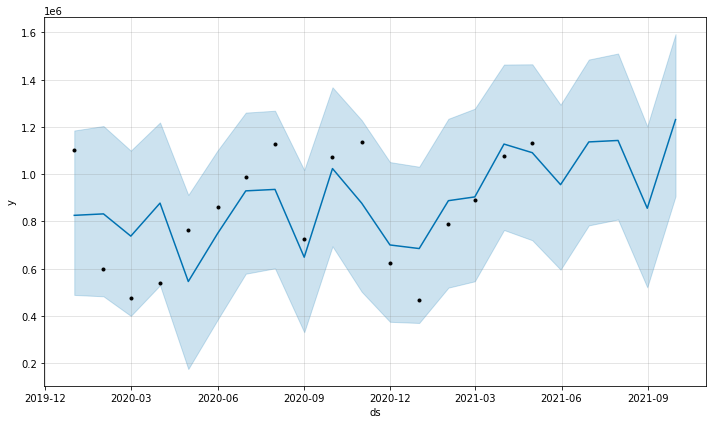

In [73]:
plot1 = m.plot(예측값)

### 한계점

* 코로나 단계별 예측이 아니라 숫자에만 의존한 모델링으로 정확한 예측을 하기 어렵다.

## 딥러닝을 통한 코로나 상황별 입도객 예측

In [3]:
import tensorflow as tf

In [5]:
df = pd.read_csv('data.csv')
df

,time,visitor,level
0,2020-01-01,1104438,0.0
1,2020-02-01,599575,0.0
2,2020-03-01,477176,0.0
3,2020-04-01,541099,0.0
4,2020-05-01,765616,0.0
5,2020-06-01,860528,0.0
6,2020-07-01,988093,0.0
7,2020-08-01,1127098,2.0
8,2020-09-01,726169,2.0
9,2020-10-01,1072455,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     18 non-null     object 
 1   visitor  18 non-null     int64  
 2   level    18 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


In [7]:
## df['time'] = pd.DatetimeIndex(df['time'])
df['time'] = df['time'].str.slice(start=5, stop=7).astype('int')
df

,time,visitor,level
0,1,1104438,0.0
1,2,599575,0.0
2,3,477176,0.0
3,4,541099,0.0
4,5,765616,0.0
5,6,860528,0.0
6,7,988093,0.0
7,8,1127098,2.0
8,9,726169,2.0
9,10,1072455,2.0


In [8]:
df['코로나_발생후_경과시간'] = np.arange(1, 19)
df

,time,visitor,level,코로나_발생후_경과시간
0,1,1104438,0.0,1
1,2,599575,0.0,2
2,3,477176,0.0,3
3,4,541099,0.0,4
4,5,765616,0.0,5
5,6,860528,0.0,6
6,7,988093,0.0,7
7,8,1127098,2.0,8
8,9,726169,2.0,9
9,10,1072455,2.0,10


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          18 non-null     int64  
 1   visitor       18 non-null     int64  
 2   level         18 non-null     float64
 3   코로나_발생후_경과시간  18 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 704.0 bytes


In [9]:
독립 = df[['코로나_발생후_경과시간', 'level']]
종속 = df[['visitor']]
독립.shape, 종속.shape

((18, 2), (18, 1))

In [15]:
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(200, activation='swish')(X)
H = tf.keras.layers.Dense(200, activation='swish')(H)
H = tf.keras.layers.Dense(200, activation='swish')(H)
H = tf.keras.layers.Dense(200, activation='swish')(H)
H = tf.keras.layers.Dense(200, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

* 히든레이어 2개, 각 레이어 노드 200개, 10000
loss = 47973883904

* 히든레이어 1개, 각 레이어 노드 200개, 100000
loss = 49393979392

* 히든레이어 3개, 각 레이어 노드 200개, 10000
loss = 12949462016

* 히든레이어 5개, 각 레이어 노드 200개, 10000
loss = 1270642432

* 히든레이어 5개, 각 레이어 노드 200개, 100000
loss = 72102568

In [17]:
model.fit(독립, 종속, epochs=100000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 8ms/step - loss: 72102568.0000
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 93186336.0000
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 141877216.0000
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 190945200.0000
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 192400016.0000
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 116532744.0000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 78797000.0000
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 55915380.0000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 55733532.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 75061488.0000


In [18]:
model.predict(독립)

array([[1089340.  ],
       [ 588761.75],
       [ 468518.06],
       [ 530718.8 ],
       [ 755355.2 ],
       [ 849133.6 ],
       [ 975736.1 ],
       [1112273.8 ],
       [ 711680.8 ],
       [1059606.8 ],
       [1122810.5 ],
       [ 610957.2 ],
       [ 455881.16],
       [ 783005.1 ],
       [ 885669.9 ],
       [1074222.6 ],
       [1126758.2 ],
       [1121900.8 ]], dtype=float32)

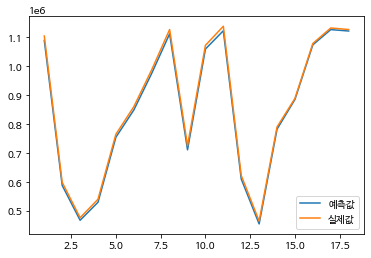

In [19]:
plt.plot(np.arange(1, 19), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 19), 종속, label='실제값')

plt.legend()
plt.show()

In [20]:
model.predict([[19, 2]]) #19가 21년 7월, 2단계

array([[1231509.2]], dtype=float32)

In [21]:
model.predict([[19, 3]]) #19가 21년 7월, 3단계

array([[590432.25]], dtype=float32)

In [23]:
model.predict([[20, 2]]) #20가 21년 8월, 2단계

array([[1261329.1]], dtype=float32)

In [24]:
model.predict([[20, 3]]) #20가 21년 8월, 3단계

array([[637242.94]], dtype=float32)

In [25]:
model.predict([[21, 2]]) #21가 21년 9월, 2단계

array([[1283802.9]], dtype=float32)

In [26]:
model.predict([[21, 3]]) #21가 21년 9월, 3단계

array([[672937.]], dtype=float32)